## LIME Test 3 Control Regression

In [1]:
# Import Libraries
import numpy as np
#import pandas as pd
from sklearn.model_selection import train_test_split

from project_utils.control_data  import Control_Data
from project_utils.feature_stats import Feature_Statistics


In [2]:
active_features  = ["Active_1", "Active_2", "Active_3", "Active_4", "Active_5"]
passive_features = ["Passive_1", "Passive_2", "Passive_3", "Passive_4", "Passive_5"]
all_features     = active_features + passive_features

In [3]:
data = Control_Data(Y_std_dev=5.0,
                    Y_Func='Regression',
                    Active_X=active_features,
                    Passive_X=passive_features,
                    Num_Samples=500,
                    feature_bounds=[0,5])
                                   #[[0,2],[1,2],[2,3],[0,5],[8,10],\
                                   # [0,2],[0,4],[0,5],[0,8],[0,10]])


In [4]:
# Splitting X & y into training and testing set
X = data.Get_Features()
y = data.Get_Outcomes()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

print('Train Test Shapes:', X_train.shape, X_test.shape)


Train Test Shapes: (400, 10) (100, 10)


In [5]:
#Train and Test a Random Forest with the data
from sklearn.ensemble import RandomForestRegressor
RF_Model = RandomForestRegressor(n_estimators=100, criterion = 'absolute_error')
RF_Model.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error')

In [6]:
#Train and Test a Linear Classifier with the data
from sklearn.linear_model import LinearRegression

LR_Model = LinearRegression(copy_X=True)
LR_Model.fit(X_train, y_train)

LinearRegression()

In [7]:
#Train and Test a Dummy Classifier with the data
#from sklearn.dummy import DummyClassifier 
#Dumb_Model = DummyClassifier (strategy = 'uniform')
#Dumb_Model.fit(X_train, y_train)

In [8]:
print('Model Score Random Forest', RF_Model.score(X_test, y_test))
print('Model Score Linear Reg.  ', LR_Model.score(X_test, y_test))
#print('Model Score Dummy        ', Dumb_Model.score(X_test, y_test))

Model Score Random Forest 0.8311454379128642
Model Score Linear Reg.   0.9737389797563372


In [9]:
print('RF Feature Importances:  ', RF_Model.feature_importances_)
print('LR Feature Coefficients: ', LR_Model.coef_)
print('LR Feature No.Features:  ', LR_Model.n_features_in_)
#print('Dumb Output Classes:     ', Dumb_Model.classes_)
#print('Dumb Class Prior:        ', Dumb_Model.class_prior_)

RF Feature Importances:   [0.13018826 0.14279912 0.16762679 0.18639541 0.20187064 0.03194128
 0.03486587 0.03401432 0.03611089 0.03418743]
LR Feature Coefficients:  [10.14101024 10.94380336 11.75849433 12.95630924 13.86944946  0.05464201
  0.24101112  0.04994701  0.12640323 -0.16942272]
LR Feature No.Features:   10


In [10]:
# LIME Explanation for Training Data
from lime import lime_tabular

LR_LIME = lime_tabular.LimeTabularExplainer(training_data=X_train,
                                            mode="regression",
                                            #training_labels=None,
                                            feature_names=data.Get_Feature_Names(),
                                            #categorical_features=None,
                                            #categorical_names=None,
                                            #kernel_width=None,
                                            #kernel=None,
                                            verbose=False,
                                            #class_names=data.Get_Class_Names(),
                                            #feature_selection='auto',
                                            discretize_continuous=False,
                                            #discretizer='quartile',
                                            sample_around_instance=True)
                                            #random_state=None,
                                            #training_data_stats=None)


In [11]:
# Generate explantion data for Random Foreall_featuresst

LR_Stats = Feature_Statistics(feature_names = all_features, mode='regression')

for test_instance in range(X_test.shape[0]):

    data_row  = X_test[test_instance,:]
    
    LR_explain_inst = LR_LIME.explain_instance(data_row=data_row,
                                               predict_fn=LR_Model.predict,
                                               #labels=None,
                                               #top_labels=None,
                                               #num_features=10,
                                               num_samples=100,
                                               #distance_metric='euclidean',
                                               #model_regressor=None,
                                               sampling_method='gaussian')
    
    y_predict = LR_Model.predict(data_row.reshape(1, -1))

    print('INSTANCE: ', test_instance)
    
    LR_Stats.Add_LIME_Sample(sample     = LR_explain_inst.as_list(),
                             outcome    = y_test[test_instance],
                             prediction = y_predict)
    
    last_instance = test_instance

INSTANCE:  0
INSTANCE:  1
INSTANCE:  2
INSTANCE:  3
INSTANCE:  4
INSTANCE:  5
INSTANCE:  6
INSTANCE:  7
INSTANCE:  8
INSTANCE:  9
INSTANCE:  10
INSTANCE:  11
INSTANCE:  12
INSTANCE:  13
INSTANCE:  14
INSTANCE:  15
INSTANCE:  16
INSTANCE:  17
INSTANCE:  18
INSTANCE:  19
INSTANCE:  20
INSTANCE:  21
INSTANCE:  22
INSTANCE:  23
INSTANCE:  24
INSTANCE:  25
INSTANCE:  26
INSTANCE:  27
INSTANCE:  28
INSTANCE:  29
INSTANCE:  30
INSTANCE:  31
INSTANCE:  32
INSTANCE:  33
INSTANCE:  34
INSTANCE:  35
INSTANCE:  36
INSTANCE:  37
INSTANCE:  38
INSTANCE:  39
INSTANCE:  40
INSTANCE:  41
INSTANCE:  42
INSTANCE:  43
INSTANCE:  44
INSTANCE:  45
INSTANCE:  46
INSTANCE:  47
INSTANCE:  48
INSTANCE:  49
INSTANCE:  50
INSTANCE:  51
INSTANCE:  52
INSTANCE:  53
INSTANCE:  54
INSTANCE:  55
INSTANCE:  56
INSTANCE:  57
INSTANCE:  58
INSTANCE:  59
INSTANCE:  60
INSTANCE:  61
INSTANCE:  62
INSTANCE:  63
INSTANCE:  64
INSTANCE:  65
INSTANCE:  66
INSTANCE:  67
INSTANCE:  68
INSTANCE:  69
INSTANCE:  70
INSTANCE:  71
IN

In [12]:
print(LR_explain_inst.as_list())

print(y_predict)

[('Active_5', 19.472247478205894), ('Active_4', 18.30687334798822), ('Active_3', 16.26339141067666), ('Active_2', 15.506596224310181), ('Active_1', 13.66586007186365), ('Passive_2', 0.4356480589268676), ('Passive_5', -0.2562406059562579), ('Passive_4', 0.20376346882077773), ('Passive_3', 0.18844766562213122), ('Passive_1', 0.16924706366176992)]
[132.03140456]


In [13]:
LR_explain_inst.show_in_notebook()

In [14]:
LR_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

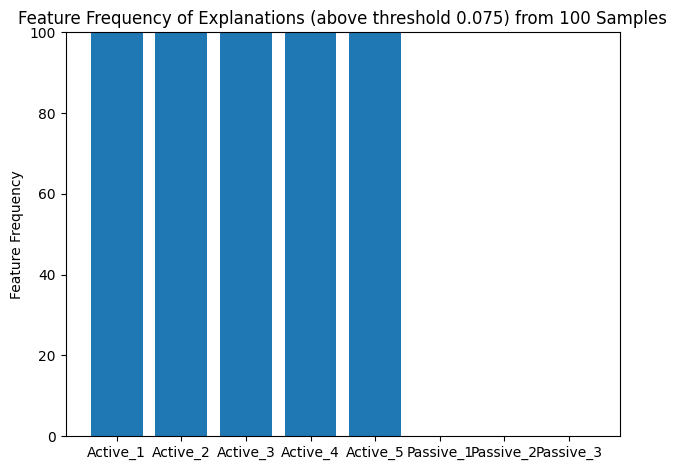

In [15]:
LR_Stats.Frequency_Plot()

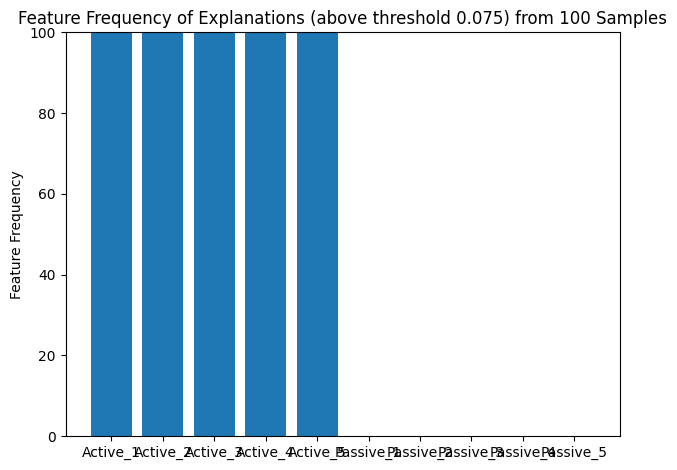

In [16]:
LR_Stats.Frequency_Plot(top_features=False)

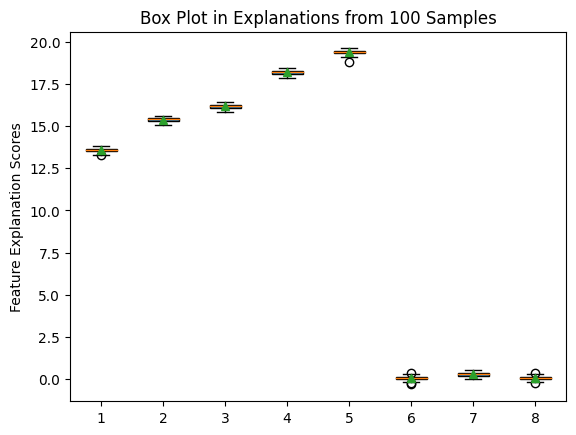

1 -      Active_1
2 -      Active_2
3 -      Active_3
4 -      Active_4
5 -      Active_5
6 -      Passive_1
7 -      Passive_2
8 -      Passive_3


In [17]:
LR_Stats.Box_Plot()

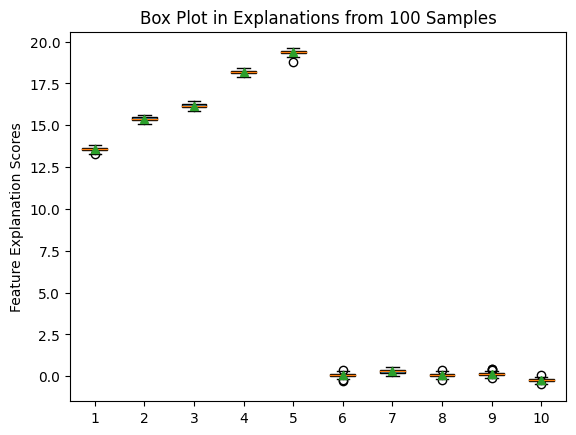

1 -      Active_1
2 -      Active_2
3 -      Active_3
4 -      Active_4
5 -      Active_5
6 -      Passive_1
7 -      Passive_2
8 -      Passive_3
9 -      Passive_4
10 -     Passive_5


In [18]:
LR_Stats.Box_Plot(top_features=False)

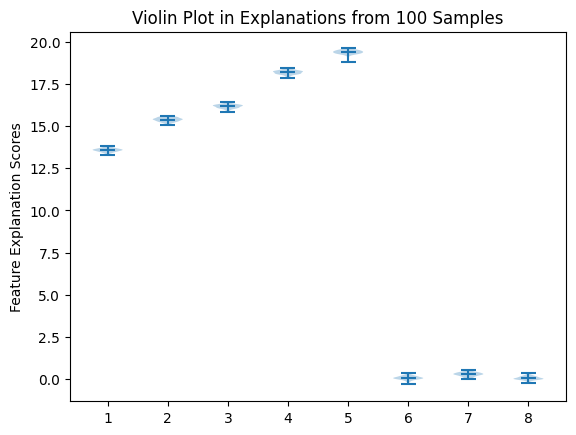

1 -      Active_1
2 -      Active_2
3 -      Active_3
4 -      Active_4
5 -      Active_5
6 -      Passive_1
7 -      Passive_2
8 -      Passive_3


In [19]:
LR_Stats.Violin_Plot()

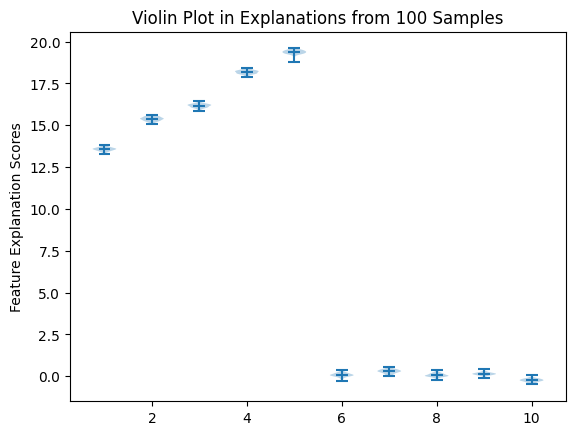

1 -      Active_1
2 -      Active_2
3 -      Active_3
4 -      Active_4
5 -      Active_5
6 -      Passive_1
7 -      Passive_2
8 -      Passive_3
9 -      Passive_4
10 -     Passive_5


In [20]:
LR_Stats.Violin_Plot(top_features=False)

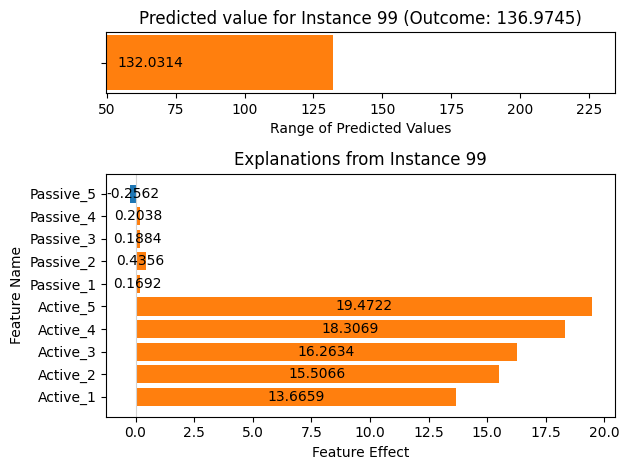

In [21]:
LR_Stats.View_Explanation(instance=last_instance)

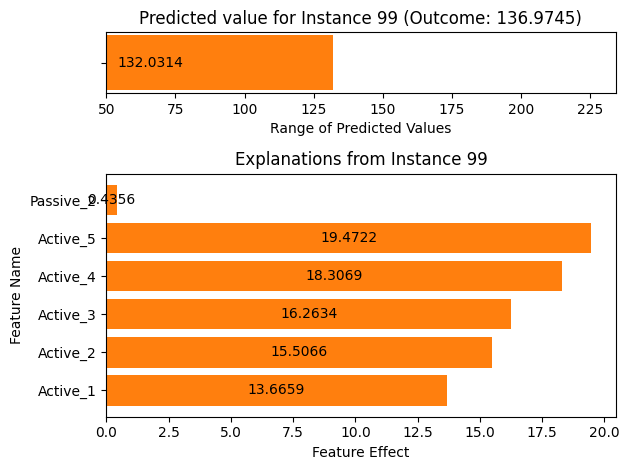

In [22]:
LR_Stats.View_Explanation(instance=last_instance, max_features=6)